# Reconhecimento de nomes de instituições utilizando Inteligência Artificial

## Projeto PIBITI  

### Edital 18/2021-PROPPG-IFG

#### Estudante (bolsista): João Gabriel Grandotto Viana
#### Orientador: Waldeyr Mendes Cordeiro da Silva

## Parte 01 Coleta e tratamento de dados das fontes primárias

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
import pandas as pd

In [3]:
url1 ='https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/scopus.csv'
url2 = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/webscience.csv'

scopus = pd.read_csv(url1)
web_of_science = pd.read_csv(url2, sep="\t" )

In [4]:
web_of_science.shape

(31, 67)

In [5]:
scopus.shape

(1276, 50)

In [6]:
#Renomeie as Colunas relacionadas porque estavam com os nomes diferentes
web_of_science.rename(columns={'Publication Year': 'Year'}, inplace = True)
web_of_science.rename(columns={'Article Title': 'Title'}, inplace = True)
web_of_science.rename(columns={'Publisher': 'Affiliations'}, inplace = True)

In [7]:
scopus["Affiliations"].head(10)

0    Instituto Federal de Goiás-IFG, Campus Goiânia...
1    Instituto Federal de Goiás (IFG), Aparecida de...
2    Instituto Federal de Educação, Ciência e Tecno...
3    Universidade Federal de Goiás – UFG, Rede Pró ...
4    Department of Agronomy, Universidade Federal R...
5    Institute for Hygiene and Public Health, Medic...
6    Department of Environmental Informatics, Helmh...
7    Grupo de Estudos em Geomática (GEO), Instituto...
8    Laboratory of Environmental Biotechnology and ...
9    Universidade Federal de Goiás (UFG), Instituto...
Name: Affiliations, dtype: object

In [8]:
web_of_science["Affiliations"].head(10)

0    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
1    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
2                        UNIV DO VALE DO RIO DOS SINOS
3    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
4                                             ELSEVIER
5                          UNIV FEDERAL CAMPINA GRANDE
6    INST FED EDUCATION, SCIENCE & TECHNOLOGY OF GO...
7                PONTIFICIA UNIV CATOLICA PARANA-PUCPR
8                             UNIV FEDERAL SANTA MARIA
9                                      INST AGRONOMICO
Name: Affiliations, dtype: object

In [9]:
#juntando os três dataframes
result = pd.concat([scopus, web_of_science])

In [10]:
nulos = result.loc[result['DOI'].isnull()] # somente registros sem DOI
nulos.index[0]
result = result.drop([nulos.index[0]])

In [11]:
total_artigos = result.shape[0]

In [12]:
result.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end',
       ...
       'Number of Pages', 'WoS Categories', 'Research Areas', 'IDS Number',
       'UT (Unique WOS ID)', 'Pubmed Id', 'Open Access Designations',
       'Highly Cited Status', 'Hot Paper Status', 'Date of Export'],
      dtype='object', length=105)

In [13]:
result['Affiliations']

0     Instituto Federal de Goiás-IFG, Campus Goiânia...
1     Instituto Federal de Goiás (IFG), Aparecida de...
2     Instituto Federal de Educação, Ciência e Tecno...
3     Universidade Federal de Goiás – UFG, Rede Pró ...
4     Department of Agronomy, Universidade Federal R...
                            ...                        
26                                      UNIV NOVE JULHO
27                                                  NaN
28                                                  NaN
29                                                  NaN
30                                                  NaN
Name: Affiliations, Length: 1306, dtype: object

In [14]:
#Verificando duplicados na coluna DOI e apagando as linhas com DOI duplicado
result = result.drop_duplicates(subset=['DOI'], keep='first')
result 
result.shape

(1162, 105)

In [15]:
duplicados_eliminados = total_artigos - result.shape[0]
duplicados_eliminados

144

In [16]:
# nomear os indices do tamanho do novo dataframe
index =[]  
for i in range(result.shape[0]): 
    index.append(i)
result.index = index

In [17]:
result[['DOI', 'Title', 'Affiliations']]

,DOI,Title,Affiliations
0,10.1016/j.nonrwa.2021.103406,Classical solution for a nonlinear hybrid syst...,"Instituto Federal de Goiás-IFG, Campus Goiânia..."
1,10.1007/978-3-030-79165-0_25,An Innovative Textile Product Proposal Based o...,"Instituto Federal de Goiás (IFG), Aparecida de..."
2,10.1590/1519-6984.245368,Detection of enteroparasites in foliar vegetab...,"Instituto Federal de Educação, Ciência e Tecno..."
3,10.1590/1519-6984.234476,"Phytochemical characterization, and antioxidan...","Universidade Federal de Goiás – UFG, Rede Pró ..."
4,10.1038/s41598-021-97854-8,Stability analysis of reference genes for RT-q...,"Department of Agronomy, Universidade Federal R..."
...,...,...,...
1157,10.31977/grirfi.v16i2.774,HUMAN RIGHTS: FROM THE UNIFORMITY OF THE SPECI...,"UNIV FED RECONCAVO BAHIA, CENTRO FORMACAO PROF..."
1158,10.1590/S0101-31732015000400002,PRESENTATION OF THE DOSSIER ROUSSEAU,UNESP-MARILIA
1159,10.1590/S1415-43662014000400013,Physiological quality of soybean seeds stored ...,UNIV FEDERAL CAMPINA GRANDE
1160,10.1590/S0034-89102010005000053,Ethics in the publication of studies on human ...,REVISTA DE SAUDE PUBLICA


In [18]:
result[['DOI','Affiliations']].to_csv("dados_para_label.tsv", sep = "\t", index=False)

## Parte 02 - Tratamento dos dados etiquetados

Os dados slecionados foram etiquetados manualmente e salvos no dataset [dados com label](https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv)

In [19]:
url = 'https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv'

dataset = pd.read_csv(url, sep="," )
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution
1038,10.3917/machr.203.0025,The geopolitical issues of the French cultural...,2010,"L'Institut Français de Géopolitique (IFG), Par...",France,L'Institut Français de Géopolitique
74,10.1007/s12274-020-2953-z,Hierarchical assemblies of molecular framework...,2021,"Institute of Functional Interfaces (IFG), Karl...",Eggenstein-Leopoldshafen,Institute of Functional Interfaces
1034,10.1021/jz100115k,Photoluminescence properties of a molecular or...,2010,Max Planck Institute for Biophysical Chemistry...,Germany,Structural Dynamics of (Bio)chemical Systems


### Estratégia 01 - Saco de palavras

Os arquivos de texto precisam ser convertidos em arquivos numéricos para serem utilizaod por algoritmos de machine learning.

A primeira estratégia que utilizaremos e aquela conhecida como saco de palavras, onde um texto é segmentado em palavras (separadas por espaço), calcula-se a frequência dessas pavras em cada documento e finalmente é atribuído um ID para cada palavra.

In [20]:
dataset = pd.read_csv('https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_com_label.csv')

dataset['IFG'] = dataset['Institution'].apply(lambda x: 1 if str(x).strip() == "Instituto Federal de Goiás" else 0)

In [21]:
dataset.sample(n=3)

,DOI,Title,Year,Affiliations,Campus,Institution,IFG
468,10.1590/1980-4415v31n58a14,Formation of the concept of volume in the earl...,2017,"Universidade Estadual Paulista (UNESP), Instit...",Goiânia,Instituto Federal de Goiás,1
34,10.1145/3466933.3466964,A Measurement Approach to the Bourdieusian Soc...,2021,"NETI-Numbers, Inhumas Campus, Federal Institut...",Inhumas,Instituto Federal de Goiás,1
422,10.1590/0104-070720180004570017,Hand hygiene and influenza prevention: Knowled...,2018,"Instituto Federal de Educação, Ciência e Tecno...",Goiânia,Instituto Federal de Goiás,1


In [22]:
X, y = dataset['Affiliations'], dataset['IFG']

In [23]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
palavrasIgnoradas = \
    stopwords.words('portuguese') + \
    stopwords.words('english') + \
    stopwords.words('german') + \
    stopwords.words('spanish')

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    max_features = 1500, # vocabulário considera top max_features ordenadas por freq do termo no texto 
    min_df = 5, # ignorar termos com frequencia menr do que x, onde 0<=x<=1
    max_df = 0.7, # ignorar termos com frequencia maior do que x, onde 0<=x<=1
    stop_words = palavrasIgnoradas
)
X = vectorizer.fit_transform(X).toarray()


*TF* $\rightarrow$ Term frequencies (frquências de termos) $\rightarrow$ count(palavra/total de palavras)

*TF-IDF* $\rightarrow$ Term Frequency times inverse document frequency $\rightarrow$ reduz o peso de palavras repetitivas

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,  
                                                    random_state=1, 
                                                    test_size=0.3, shuffle=True)
x_train.shape, x_test.shape

((813, 1033), (349, 1033))

#### **Kernel Linear**

In [28]:
from sklearn import svm
svm_kernel_linear = svm.SVC(kernel = 'linear')
prob_linear = svm_kernel_linear.fit(x_train, y_train)
pred_svm_linear = svm_kernel_linear.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_test, pred_svm_linear) * 100, '%')

Acurácia = 97.70773638968481 %


In [30]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_svm_linear)
roc_auc = metrics.auc(fpr, tpr)

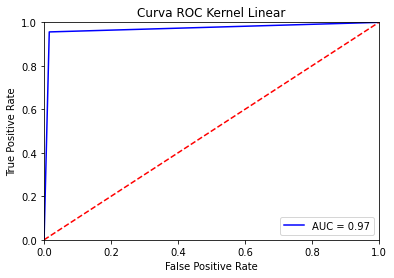

In [31]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Curva ROC Kernel Linear')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### **Kernel Poly**

In [32]:
from sklearn import svm
svm_kernel_poly = svm.SVC(kernel = 'poly')
prob_poly = svm_kernel_poly.fit(x_train, y_train)
pred_svm_poly = svm_kernel_poly.predict(x_test)


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_test, pred_svm_poly) * 100, '%')

Acurácia = 96.84813753581662 %


In [34]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_svm_poly)
roc_auc = metrics.auc(fpr, tpr)

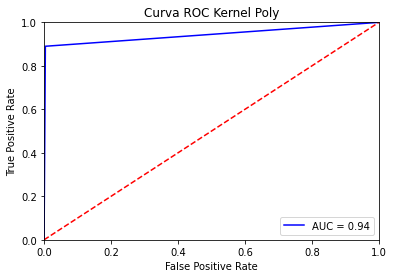

In [35]:
import matplotlib.pyplot as plt
plt.title('Curva ROC Kernel Poly')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### **Kernel RBF**

In [36]:
from sklearn import svm
svm_kernel_rbf = svm.SVC(kernel = 'rbf')

prob_rbf = svm_kernel_rbf.fit(x_train, y_train)
pred_svm_rbf = svm_kernel_rbf.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_test, pred_svm_rbf) * 100, '%')

Acurácia = 97.134670487106 %


In [38]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_svm_rbf)
roc_auc = metrics.auc(fpr, tpr)

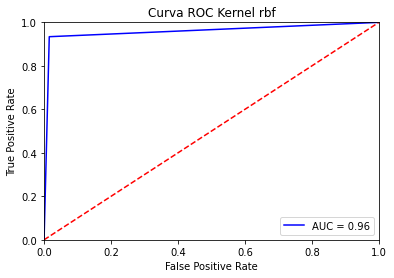

In [39]:
import matplotlib.pyplot as plt
plt.title('Curva ROC Kernel rbf')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### **Kernel Sigmoid**

In [40]:
from sklearn import svm
svm_kernel_sigmoid = svm.SVC(kernel = 'sigmoid')

prob_sigmoid = svm_kernel_sigmoid.fit(x_train, y_train)
pred_svm_sigmoid = svm_kernel_sigmoid.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_test, pred_svm_sigmoid) * 100, '%')

Acurácia = 98.28080229226362 %


In [42]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_svm_sigmoid)
roc_auc = metrics.auc(fpr, tpr)

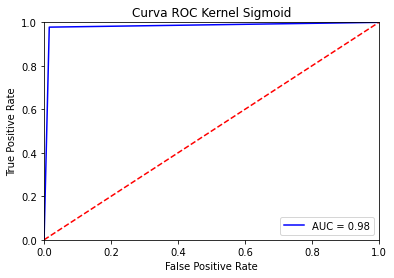

In [43]:
import matplotlib.pyplot as plt
plt.title('Curva ROC Kernel Sigmoid')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Multiclassificação

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image 
from six import StringIO

In [2]:
url = "https://raw.githubusercontent.com/joaograndotto/PIBITI/main/Datasets/dados_multi_classe.csv"
df = pd.read_csv(url, delimiter=',')

In [3]:
df['Affiliations'] = df['Affiliations'].apply( lambda x : str(x).lower() )
df['Institution'] = df['Institution'].apply( lambda x : str(x).lower() )

In [4]:
X, y = df['Affiliations'], df['Institution']
X.shape, y.shape

((121778,), (121778,))

In [5]:
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
palavrasIgnoradas = \
    stopwords.words('portuguese') + \
    stopwords.words('english') + \
    stopwords.words('german') + \
    stopwords.words('spanish')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(
    max_features = 1500, # vocabulário considera top max_features ordenadas por freq do termo no texto 
    min_df = 5, # ignorar termos com frequencia menor do que x, onde 0<=x<=1
    max_df = 0.7, # ignorar termos com frequencia maior do que x, onde 0<=x<=1
    stop_words = palavrasIgnoradas
)

In [8]:
vectorizer.fit_transform(X)

<121778x1500 sparse matrix of type '<class 'numpy.int64'>'
	with 552759 stored elements in Compressed Sparse Row format>

In [9]:
X = vectorizer.fit_transform(X).toarray()

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [11]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.1, random_state=0)

In [55]:
X_treino.shape, y_teste.shape

((109600, 1500), (12178,))

In [ ]:
from sklearn import svm
svm_kernel_linear = svm.SVC(kernel = 'linear',gamma=0.5, C=0.1)
prob_linear = svm_kernel_linear.fit(X_treino, y_treino)

In [ ]:
pred_svm_linear = svm_kernel_linear.predict(X_teste)
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_teste, pred_svm_linear) * 100, '%')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Acurácia =", accuracy_score(y_teste, pred_svm_linear) * 100, '%')